In [1]:
#!/usr/bin/env python
## USAGE --- python read_h5.py
from __future__ import print_function
import sys
import h5py
import pandas
import sys, os, copy
os.environ['TERM'] = 'linux'
import numpy as np
import pickle




import numpy as np
np.seterr(divide="ignore")
import logging
import pickle
import glob
import pandas as pd
import os
import scipy as sp
import json

import itertools

# from sklearn.preprocessing import RobustScaler
# from sklearn.utils import check_random_state
# from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from scipy import interp

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 6)


import matplotlib as mpl
from matplotlib import rcParams
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from matplotlib import ticker
from matplotlib import colors
from matplotlib.patches import Ellipse

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# rcParams.update({'figure.autolayout': True})

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
mpl.rc('axes',edgecolor='k')
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'

plt.rcParams['text.usetex'] = False
# plt.rcParams['font.family'] = "serif"
# plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

In [3]:
def plot_show(filename=None,totjets=None,title=None,xlabel=None,ylabel=None):
#     plt.tight_layout()
    plt.title(str(title)+' - '+totjets)
#     plt.xlabel(str(xlabel), fontsize=15)
#     plt.ylabel(str(ylabel), fontsize=15)
    plt.xlabel(str(xlabel))
    plt.ylabel(str(ylabel))
#     plt.xlim([-0.01, 1.02])
#     plt.ylim(1, 200000)
#     plt.yscale("log")
    plt.legend(loc="best")
    plt.grid(which='both',axis='both',linestyle='--')
#     plt.figure(figsize=(100,100))
    
    if filename:
        plt.savefig(filename)
    
    plt.show()

## Read h5 files

In [80]:
### This function reads the h5 files and saves the jets in numpy arrays
def h5_to_npy(filename,Njets):
    file = pandas.HDFStore(filename)
    jets=np.array(file.select("table",start=0,stop=Njets))
    jets2=jets[:,0:800].reshape((Njets,200,4)) #This way I'm getting the 1st 199 constituents. jets[:,800:804] is the constituent 200. jets[:,804] has a label=0 for train, 1 for test, 2 for val. jets[:,805] has the label sg/bg
#     print('jets2=',jets2[0])
    labels=jets[:,805:806]
#     print('labels=',labels)
    npy_jets=[]
    for i in range(len(jets2)):
#         print('~np.all(jets2[i] == 0, axis=1)=',~np.all(jets2[i] == 0, axis=1))
        # Get the index of non-zero entries
        nonzero_entries=jets2[i][~np.all(jets2[i] == 0, axis=1)]
        npy_jets.append([nonzero_entries,0 if labels[i] == 0 else 1])
    return npy_jets

### Check True labels

In [57]:
def h5_to_npy_test(filename,Njets):
    file = pandas.HDFStore(filename)
    jets=np.array(file.select("table",start=0,stop=Njets))
    jets2=jets[:,0:800].reshape((Njets,200,4))
#     print('jets2=',jets2[0])
    labels=jets[:,804::]
    print('labels=',labels)


In [73]:
test=h5_to_npy_test('in_data/val.h5',50)
# test[0][-10::]

labels= [[2. 0.]
 [2. 0.]
 [2. 0.]
 [2. 0.]
 [2. 0.]
 [2. 0.]
 [2. 0.]
 [2. 0.]
 [2. 0.]
 [2. 0.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]]


In [72]:
test=h5_to_npy_test('in_data/train.h5',50)

labels= [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [71]:
test=h5_to_npy_test('in_data/test.h5',50)

labels= [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [3]:
test_data=h5_to_npy('in_data/test.h5',400000)

In [14]:
print('test data shape=',np.shape(test_data))
test_data=np.asarray(test_data)
unique, counts = np.unique(test_data[:,1], return_counts=True)
print('Number of sg and bg jets=',dict(zip(unique, counts)))
test_data[20:40,1]

test data shape= (400000, 2)
Number of sg and bg jets= {0: 199974, 1: 200026}


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=object)

In [16]:
# h5_to_npy('in_data/val.h5',1)

### Load .h5 and save np arrays

In [3]:
train_data=h5_to_npy('in_data/train.h5',1200000)
with open('out_data/train_jets.pkl', "wb") as f: pickle.dump(train_data, f, protocol=2)

In [4]:
val_data=h5_to_npy('in_data/val.h5',400000)
with open('out_data/val_jets.pkl', "wb") as f: pickle.dump(val_data, f, protocol=2)

In [3]:
test_data=h5_to_npy('in_data/test.h5',400000)
with open('out_data/test_jets.pkl', "wb") as f: pickle.dump(test_data, f, protocol=2)

In [1]:
# # Preprocessed samples
# train_data_R03=h5_to_npy('in_data/train.h5',1200000)
# with open('out_data/train_jets.pkl', "wb") as f: pickle.dump(train_data, f, protocol=2)

In [4]:
# val_data_10=h5_to_npy('in_data/val.h5',10)
# with open('out_data/val_jets_10.pkl', "wb") as f: pickle.dump(val_data_10, f, protocol=2)

## Get Histograms

In [4]:
def load_split(toptag_reference_test):
    
#     toptag_reference_test='../data/inputTrees/top_tag_reference_dataset/tree_test_jets.pkl'
    with open(toptag_reference_test, "rb") as f: toptag_reference_test =pickle.load(f,encoding='latin-1')
        
    toptag_reference_test_x=np.asarray([x for (x,y) in toptag_reference_test])
    toptag_reference_test_y=np.asarray([y for (x,y) in toptag_reference_test])
#     print('len(toptag_reference_test_x) =',len(toptag_reference_test_x))
    
    test_bg=toptag_reference_test_x[toptag_reference_test_y==0]
    test_sg=toptag_reference_test_x[toptag_reference_test_y==1]
    
    return test_bg, test_sg

In [5]:
def make_hist(train_bg,train_sg,variable,title,xlabel,ylabel,Range=None,get_data=True):
    
    if get_data:
        variable_train_bg=[train_bg[i][str(variable)] for i in range(0,len(train_bg))]
        variable_train_sig=[train_sg[i][str(variable)] for i in range(0,len(train_sg))]
        
    else:
        variable_train_bg=train_bg
        variable_train_sig=train_sg
        
    print('len(bg)= ',len(variable_train_bg))
    print('len(sg)= ',len(variable_train_sig))
    print('----'*10)
    plt.hist(variable_train_bg, histtype="step", fill=False, align='mid',range=Range,label='qcd')
    plt.hist(variable_train_sig, histtype="step", fill=False, align='mid',range=Range,label='top')
    
    plt.title(str(title))
#     plt.xlabel(str(xlabel), fontsize=15)
#     plt.ylabel(str(ylabel), fontsize=15)
    plt.xlabel(str(xlabel))
    plt.ylabel(str(ylabel))
#     plt.xlim([-0.01, 1.02])
#     plt.ylim(1, 200000)
#     plt.yscale("log")
    plt.legend(loc="best")
    plt.grid(which='both',axis='both',linestyle='--')
    plt.show()

In [6]:
def plot_all(bg,sg,bg_preprocessed,sg_preprocessed):
    
    #Mass
    make_hist(bg, sg ,'mass','Mass - No preprocessing','mass','# counts')
    make_hist(bg_preprocessed, sg_preprocessed ,'mass','Mass - After preprocessing NYU','mass','# counts')
    print('===='*25)
    print('===='*25)
    
    #Energy
    make_hist(bg, sg ,'energy','Energy - No preprocessing','energy','# counts')
    make_hist(bg_preprocessed, sg_preprocessed ,'energy','Energy - After preprocessing NYU','energy','# counts',Range=[550,700])
    print('===='*25)
    print('===='*25)
    
    # pT
    make_hist(bg, sg ,'pt','pT - No preprocessing','pT','# counts',Range=[500,700])
    make_hist(bg_preprocessed, sg_preprocessed ,'pt','pT - After preprocessing NYU','pT','# counts',Range=[500,700])
    print('===='*25)
    print('===='*25)
    
    #pz
    bgPz=[bg[i]["content"][0, 2] for i in range(len(bg))]
    sgPz=[sg[i]["content"][0, 2] for i in range(len(sg))]
    bg_preprocessedPz=[bg_preprocessed[i]["content"][0, 2] for i in range(len(bg_preprocessed))]
    sg_preprocessedPz=[sg_preprocessed[i]["content"][0, 2] for i in range(len(sg_preprocessed))]
    
    make_hist(bgPz, sgPz ,'pz','pz - No preprocessing','pz','# counts',get_data=False)
    make_hist(bg_preprocessedPz, sg_preprocessedPz ,'pz','pz - After preprocessing NYU','pz','# counts',get_data=False)
    print('===='*25)
    print('===='*25)    
    
    #Eta
    make_hist(bg, sg ,'eta','Eta - No preprocessing','eta','# counts')
    make_hist(bg_preprocessed, sg_preprocessed ,'eta','Eta - After preprocessing NYU','eta','# counts',Range=[-0.1,0.2])
    print('===='*25)
    print('===='*25)
    
    #Phi
    make_hist(bg, sg ,'phi','Phi - No preprocessing','phi','# counts')
    make_hist(bg_preprocessed, sg_preprocessed ,'phi','Phi - After preprocessing NYU','phi','# counts',Range=[-0.1,0.2])
    print('===='*25)
    print('===='*25)

### LOAD DATASETS AND SPLIT BETWEEN SIGNAL AND BACKGROUND

#### ORIGINAL DATASET - NO PREPROCESSING

In [7]:
train_bg, train_sg=load_split('../data/inputTrees/top_tag_reference_dataset/tree_train_jets.pkl')

In [8]:
val_bg, val_sg=load_split('../data/inputTrees/top_tag_reference_dataset/tree_val_jets.pkl')

In [9]:
test_bg, test_sg=load_split('../data/inputTrees/top_tag_reference_dataset/tree_test_jets.pkl')

#### NYU PREPROCESSED DATASET

In [10]:
train_bg_R03, train_sg_R03 = load_split('../data/inputTrees/top_tag_reference_dataset/tree_train_jets_1200000_R_0.3_rot_boost_rot_flip.pkl')

In [11]:
val_bg_R03, val_sg_R03 = load_split('../data/inputTrees/top_tag_reference_dataset/tree_val_jets_400000_R_0.3_rot_boost_rot_flip.pkl')

In [12]:
test_bg_R03, test_sg_R03 = load_split('../data/inputTrees/top_tag_reference_dataset/tree_test_jets_400000_R_0.3_rot_boost_rot_flip.pkl')

In [128]:
# Check if jet mass was preserved
print('train_bg[0][mass]=',train_bg[0]['mass'])
print((train_bg[0]['content'][0,3]**2-(train_bg[0]['content'][0,0:3]**2).sum())**0.5)

train_bg[0][mass]= 37.39561634736989
37.395616347371444


In [13]:
# Check if jet mass was preserved
print('train_sg[0][mass]=',train_sg_R03[0]['mass'])
print((train_sg_R03[0]['content'][0,3]**2-(train_sg_R03[0]['content'][0,0:3]**2).sum())**0.5)

train_sg[0][mass]= 171.30406092237047
171.30406092237047


### TRAIN DATASETS

len(bg)=  600073
len(sg)=  599927
----------------------------------------


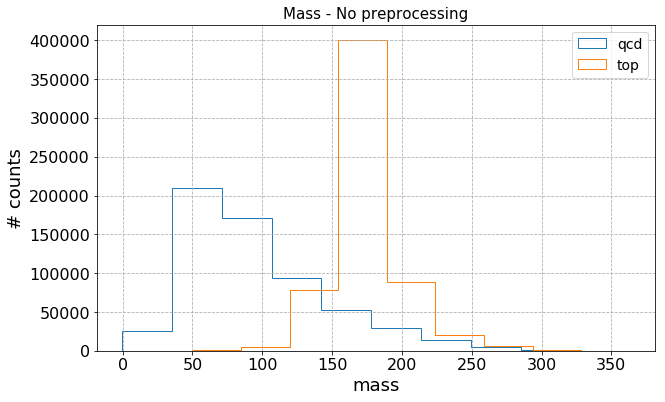

len(bg)=  600073
len(sg)=  599927
----------------------------------------


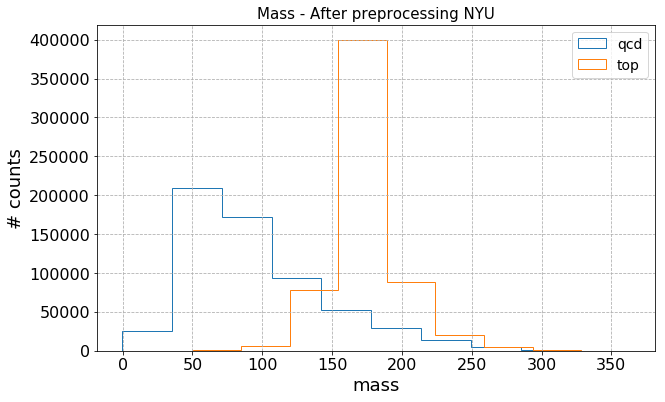

len(bg)=  600073
len(sg)=  599927
----------------------------------------


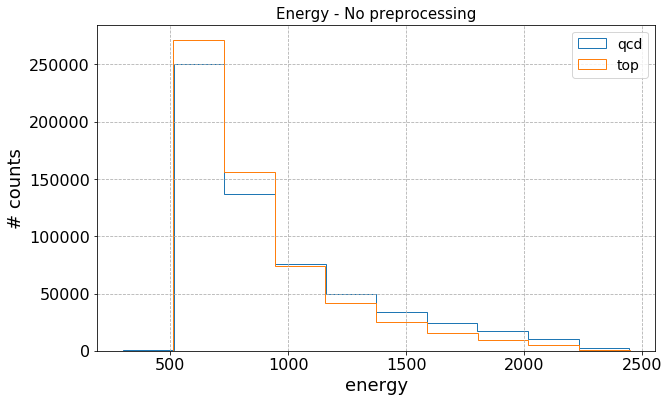

len(bg)=  600073
len(sg)=  599927
----------------------------------------


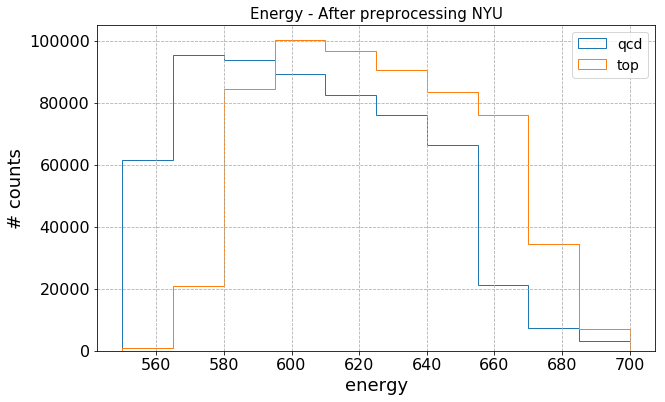

len(bg)=  600073
len(sg)=  599927
----------------------------------------


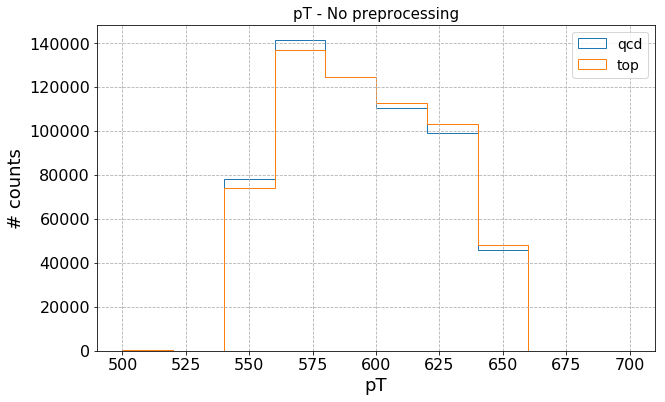

len(bg)=  600073
len(sg)=  599927
----------------------------------------


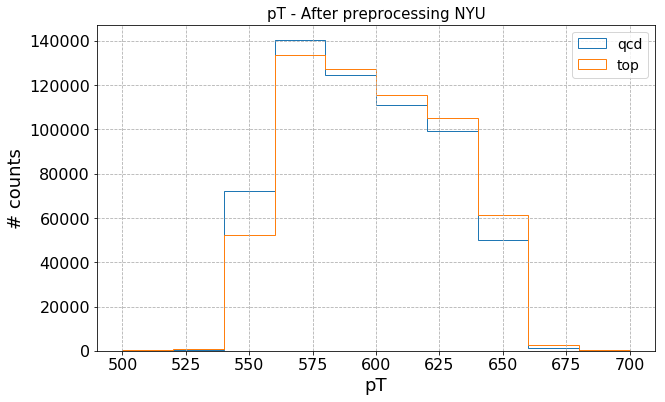

len(bg)=  600073
len(sg)=  599927
----------------------------------------


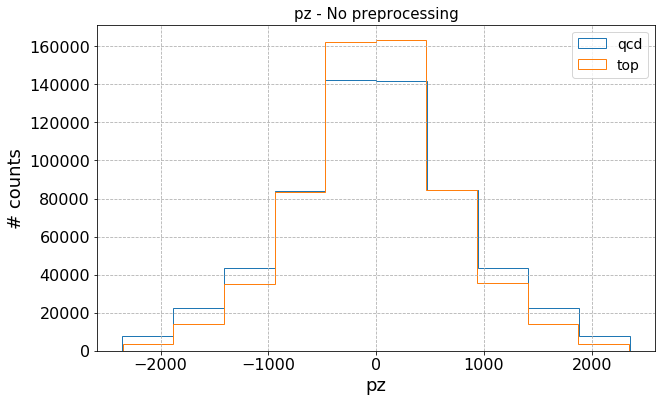

len(bg)=  600073
len(sg)=  599927
----------------------------------------


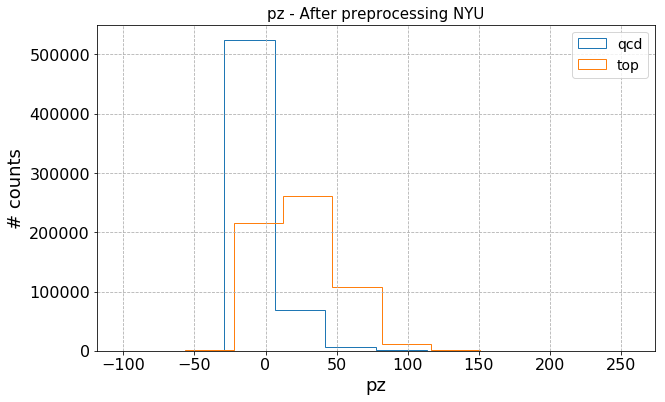

len(bg)=  600073
len(sg)=  599927
----------------------------------------


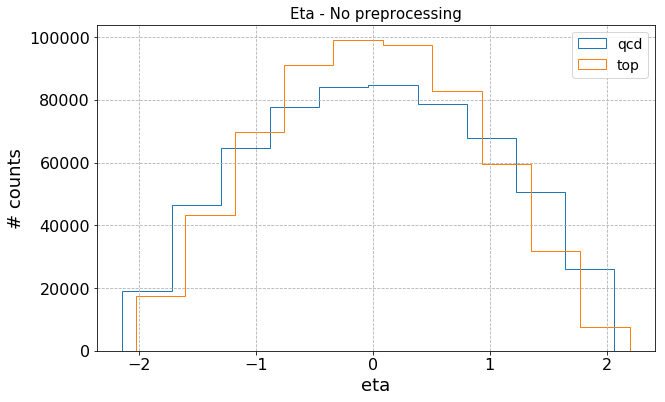

len(bg)=  600073
len(sg)=  599927
----------------------------------------


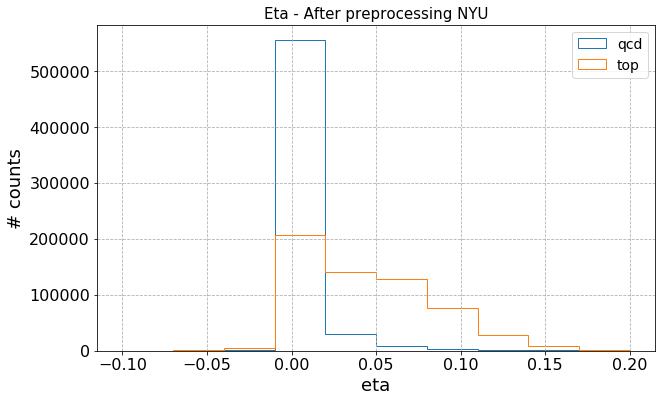

len(bg)=  600073
len(sg)=  599927
----------------------------------------


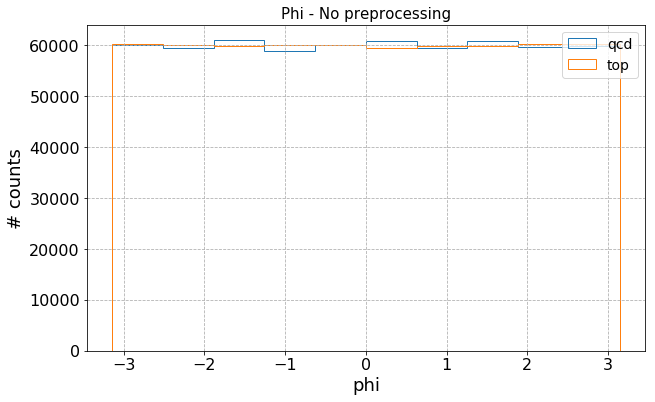

len(bg)=  600073
len(sg)=  599927
----------------------------------------


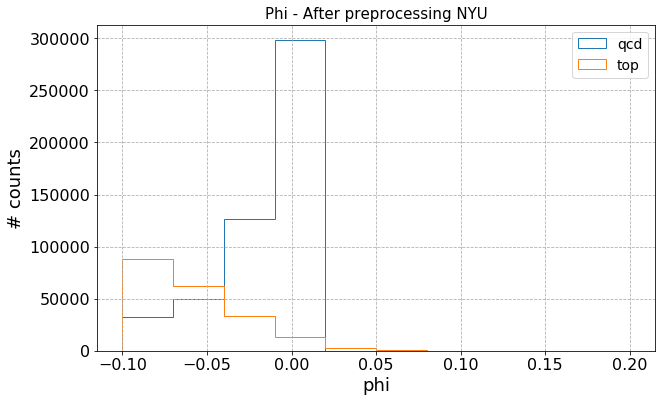

In [14]:
plot_all(train_bg,train_sg,train_bg_R03,train_sg_R03)

### VALIDATION DATASETS

len(bg)=  200003
len(sg)=  199997
----------------------------------------


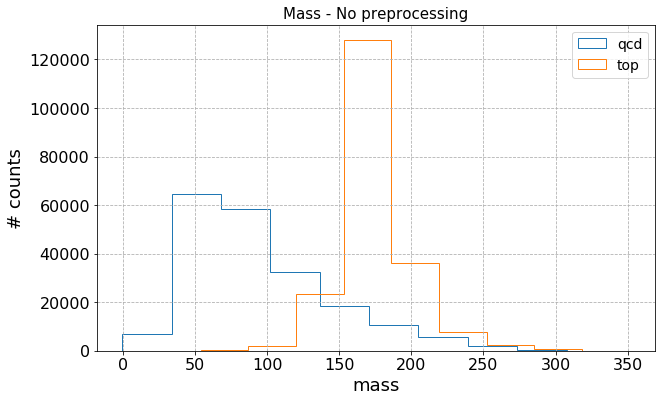

len(bg)=  200003
len(sg)=  199997
----------------------------------------


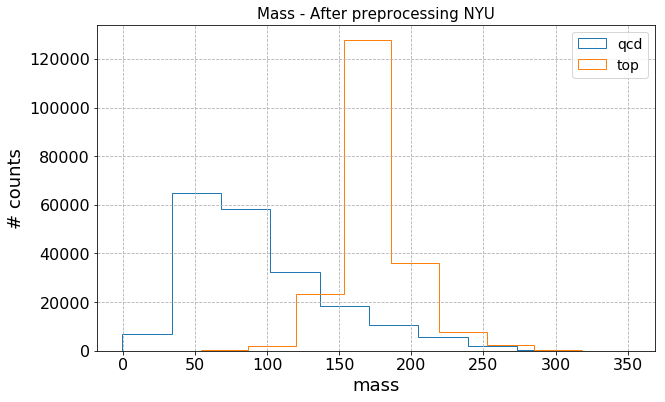

len(bg)=  200003
len(sg)=  199997
----------------------------------------


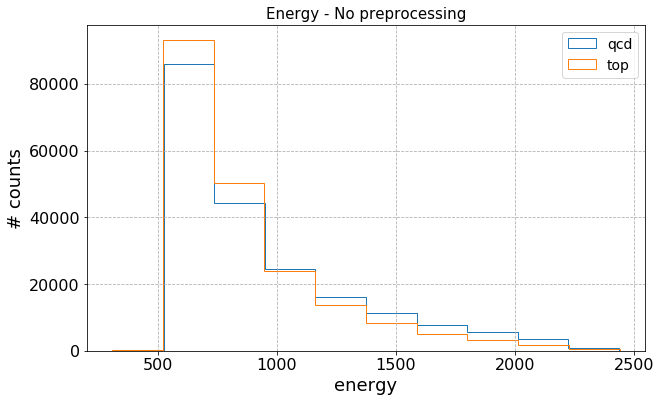

len(bg)=  200003
len(sg)=  199997
----------------------------------------


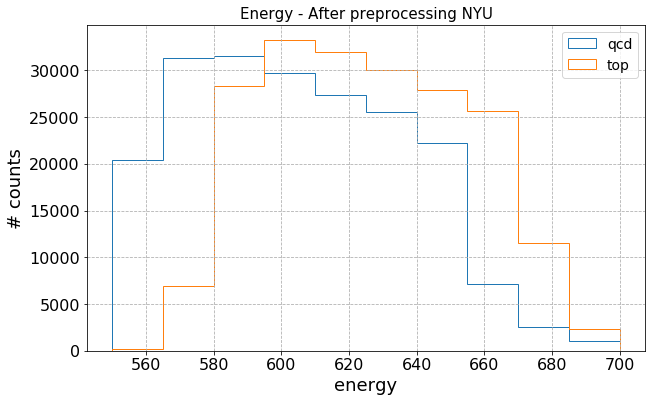

len(bg)=  200003
len(sg)=  199997
----------------------------------------


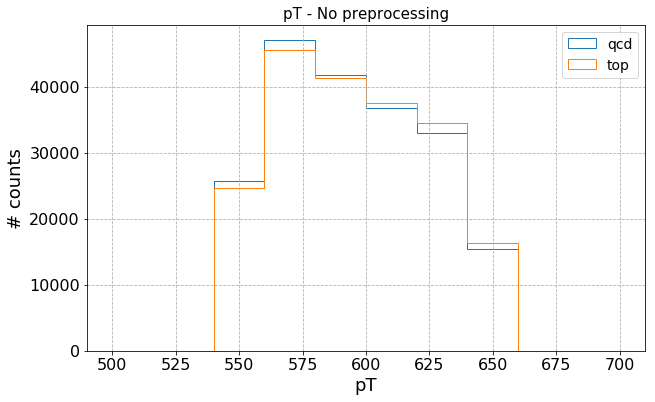

len(bg)=  200003
len(sg)=  199997
----------------------------------------


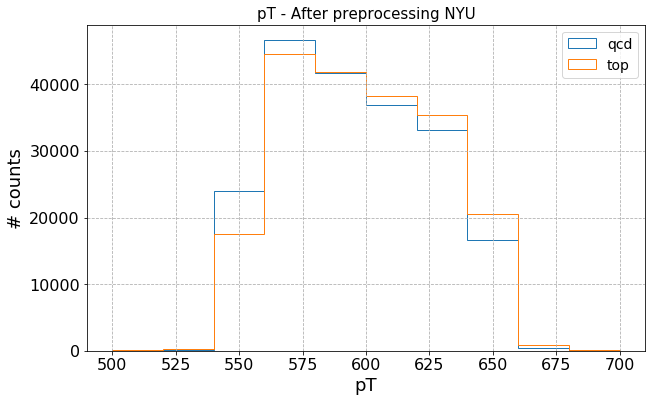

len(bg)=  200003
len(sg)=  199997
----------------------------------------


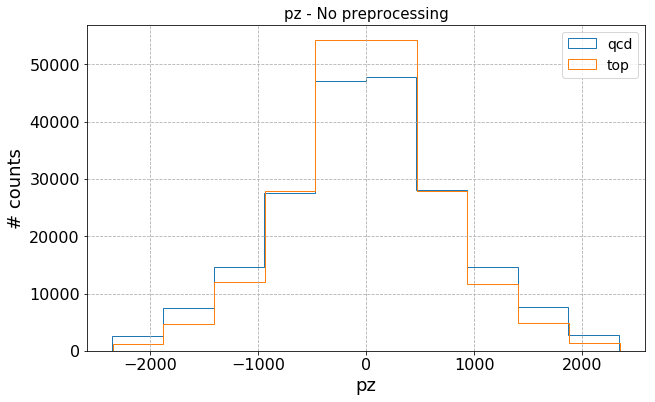

len(bg)=  200003
len(sg)=  199997
----------------------------------------


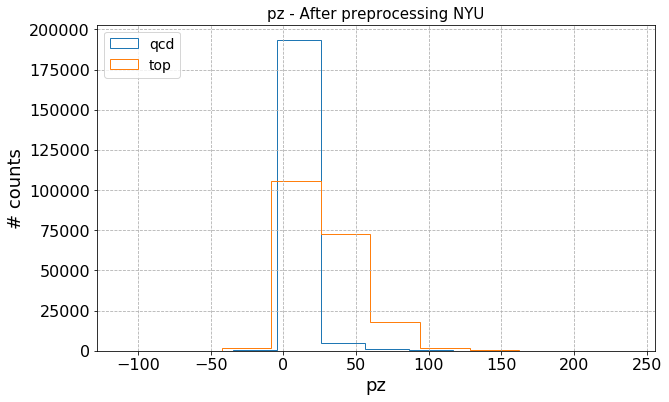

len(bg)=  200003
len(sg)=  199997
----------------------------------------


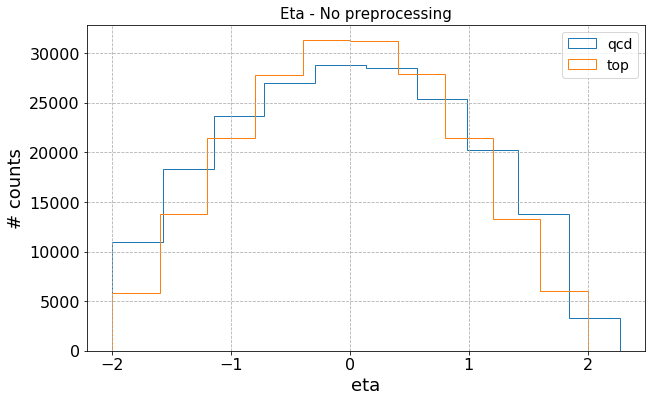

len(bg)=  200003
len(sg)=  199997
----------------------------------------


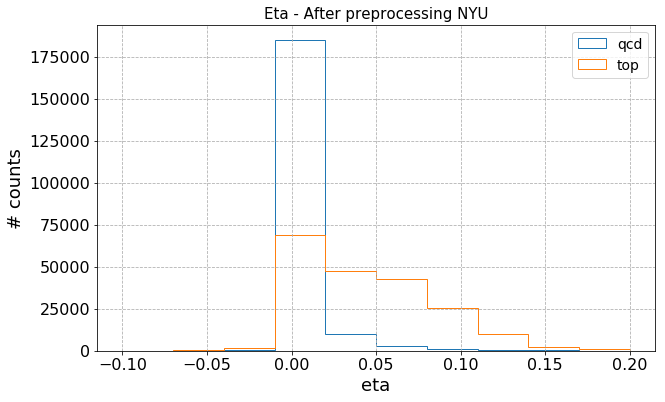

len(bg)=  200003
len(sg)=  199997
----------------------------------------


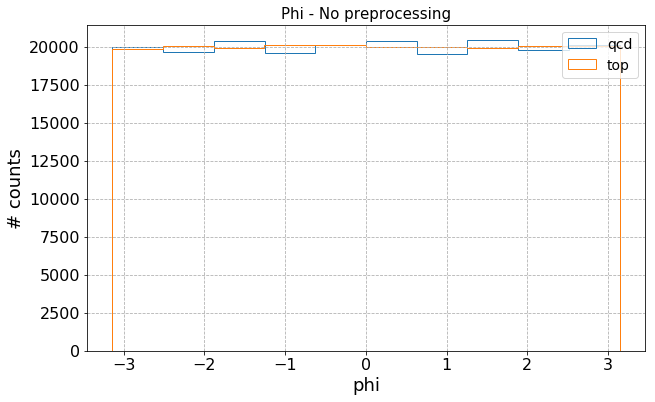

len(bg)=  200003
len(sg)=  199997
----------------------------------------


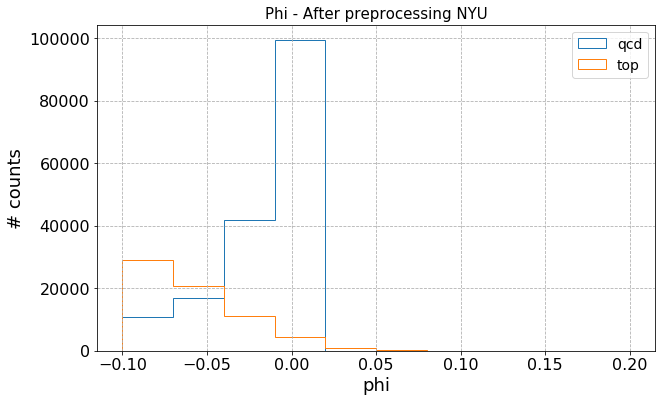

In [66]:
plot_all(val_bg,val_sg,val_bg_R03,val_sg_R03)

### TEST DATASETS

len(bg)=  199974
len(sg)=  200026
----------------------------------------


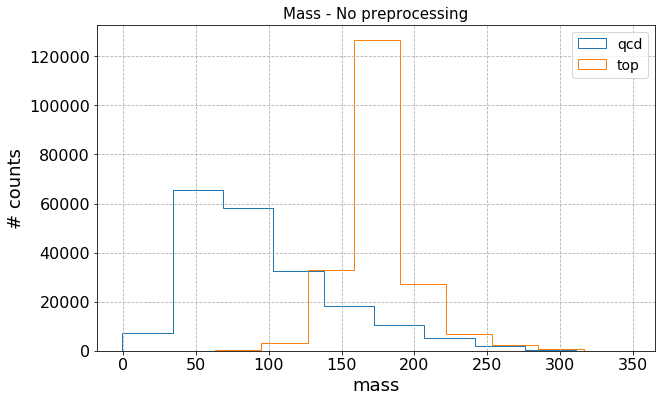

len(bg)=  199974
len(sg)=  200026
----------------------------------------


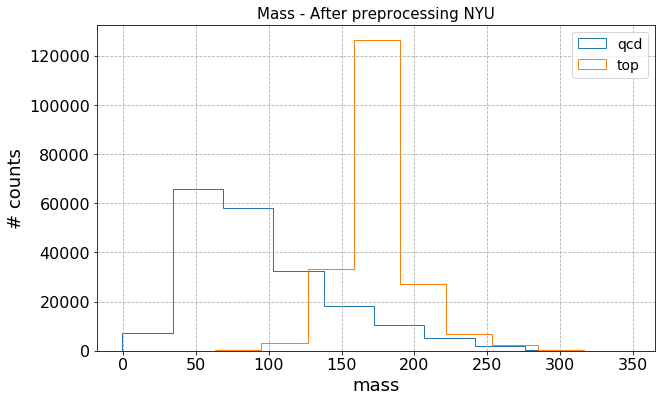

len(bg)=  199974
len(sg)=  200026
----------------------------------------


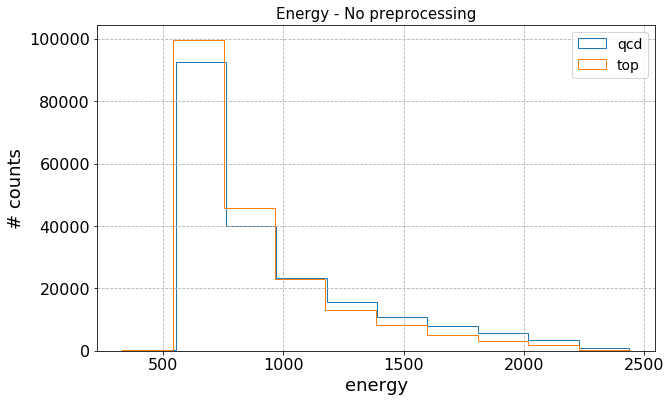

len(bg)=  199974
len(sg)=  200026
----------------------------------------


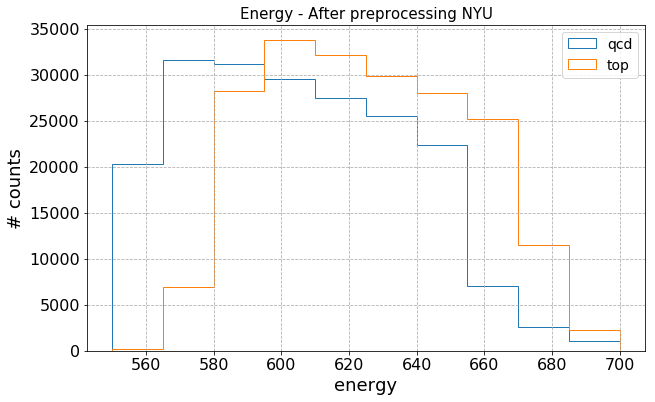

len(bg)=  199974
len(sg)=  200026
----------------------------------------


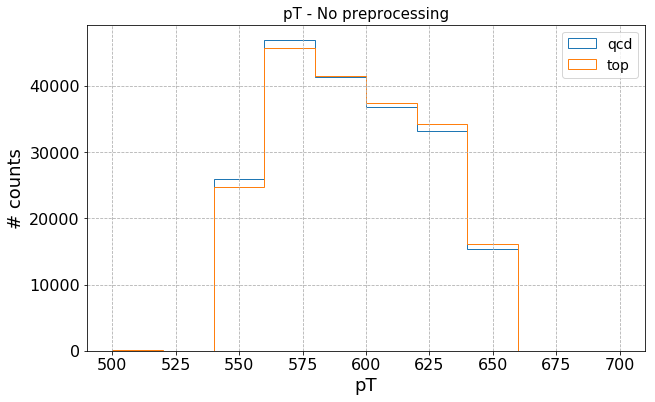

len(bg)=  199974
len(sg)=  200026
----------------------------------------


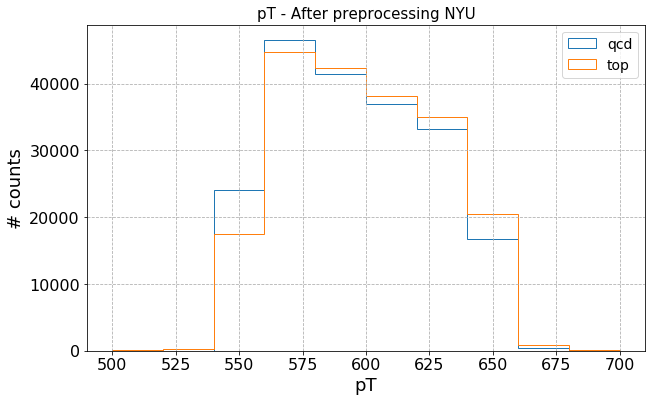

len(bg)=  199974
len(sg)=  200026
----------------------------------------


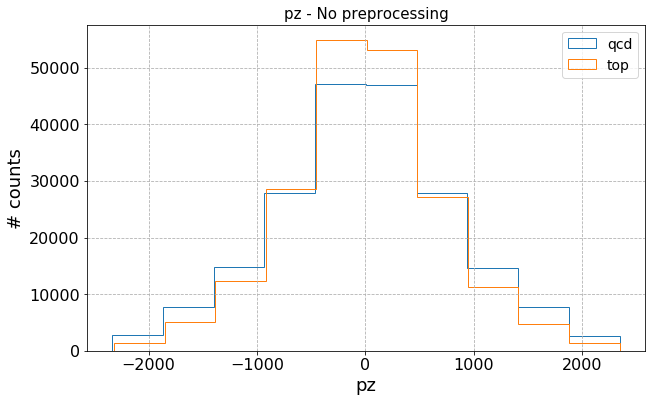

len(bg)=  199974
len(sg)=  200026
----------------------------------------


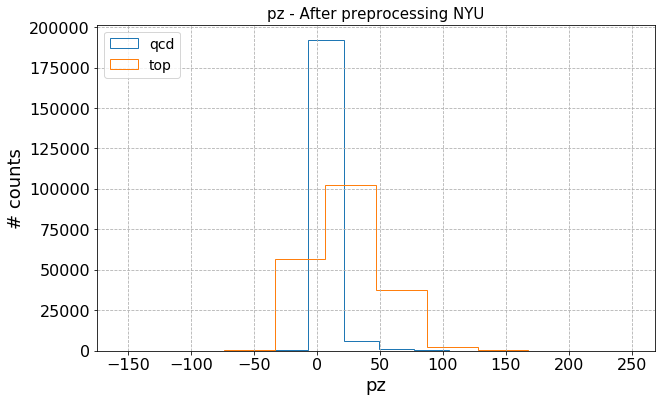

len(bg)=  199974
len(sg)=  200026
----------------------------------------


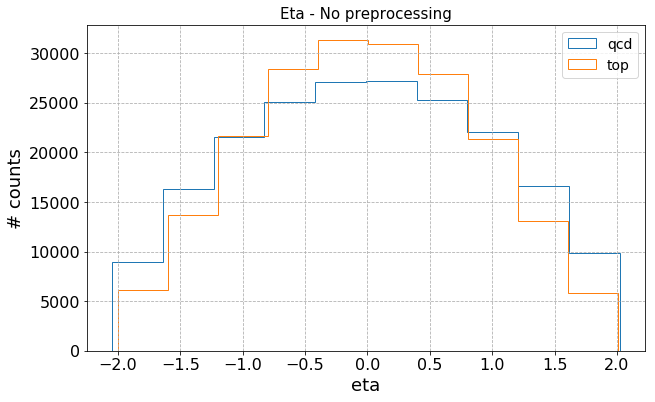

len(bg)=  199974
len(sg)=  200026
----------------------------------------


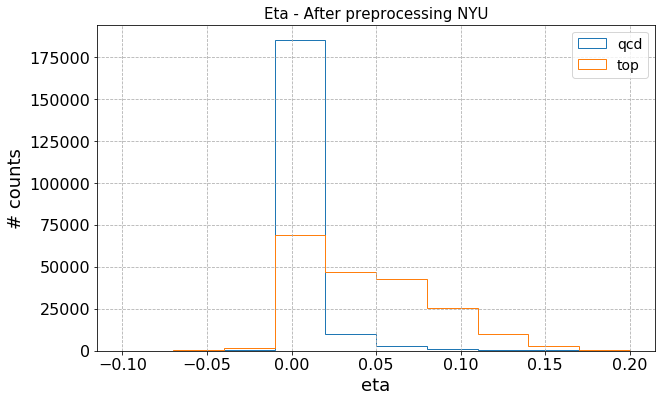

len(bg)=  199974
len(sg)=  200026
----------------------------------------


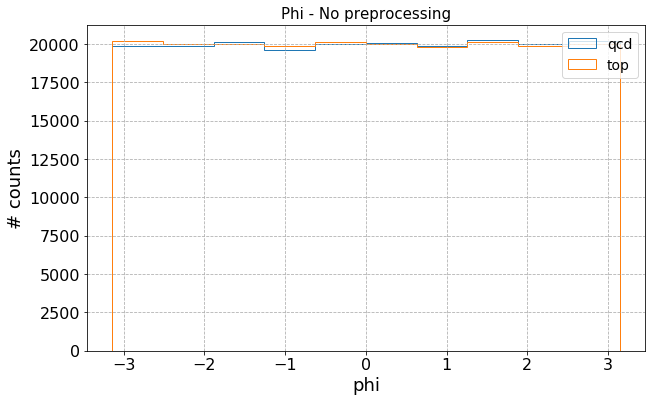

len(bg)=  199974
len(sg)=  200026
----------------------------------------


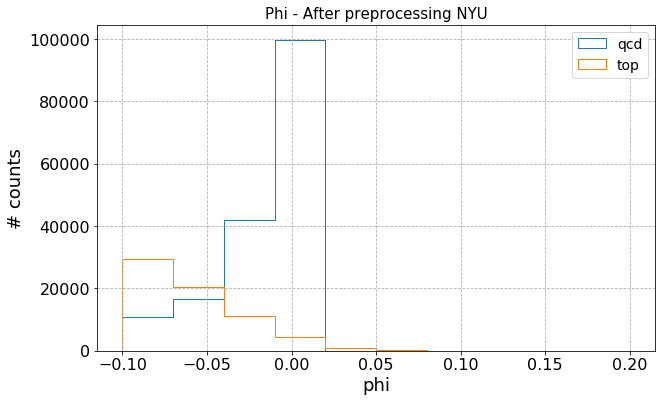

In [67]:
plot_all(test_bg,test_sg,test_bg_R03,test_sg_R03)

## JET IMAGES

In [89]:
plt.rcParams['figure.figsize'] = 6, 6

In [104]:
# Plot pT
def make_image(jets,DReta,DRphi,npoints,title=None,xlabel='eta',ylabel='phi',Njets=''):
    grid= np.zeros((npoints-1,npoints-1))
#     jets_pT=[]
#     jets_eta=[]
#     jets_phi=[]
    for jet in jets:
#         jet_pT=[]
#         jet_eta=[]
#         jet_phi=[]
        for i in range(len(jet["content"])):
            px = jet["content"][i, 0]
            py = jet["content"][i, 1]
            pz = jet["content"][i, 2]

            p = (jet["content"][i, 0:3] ** 2).sum() ** 0.5
            eta = 0.5 * (np.log(p + pz) - np.log(p - pz)) #pseudorapidity. 
    #         pt = p / np.cosh(eta)
            phi = np.arctan2(py, px) # np.arctan2 it the element-wise arc tangent of x1/x2 choosing the quadrant correctly (starting from the x axis).
            pt = (jet["content"][i, 0:2] ** 2).sum() ** 0.5

            
            eta_pos=((eta+DReta)/(2*DReta/float(npoints-1))).astype(int)
            phi_pos = ((phi+DRphi)/(2*DRphi/float(npoints-1))).astype(int)
            
            grid[-phi_pos,eta_pos]+=pt
#             grid[eta_pos,phi_pos]+=pt
            
            
#             jet_pT.append(pt)
#             jet_eta.append(eta)
#             jet_phi.append(phi) 

#         jets_pT.append(jet_pT)
#         jets_eta.append(jet_eta)
#         jets_phi.append(jet_phi) 
        
#     return jets_pT, jets_eta, jets_phi

    print('Number of jets =',Njets)
    plt.clf()    
    plt.pcolor(np.log10(grid+1e-5), cmap='Greys')
#     plt.pcolor(grid, cmap='Greys')

    plt.title(str(title))
#     plt.xlabel(str(xlabel), fontsize=15)
#     plt.ylabel(str(ylabel), fontsize=15)
    plt.xlabel(str(xlabel))
    plt.ylabel(str(ylabel))
#     plt.xlim([-0.01, 1.02])
#     plt.ylim(1, 200000)
#     plt.yscale("log")
#     plt.legend(loc="best")

    plt.show()
#     return grid

In [117]:
def plot_images(filename,DReta=1.6,DRphi=1.6,npoints=38):
    bg, sg=load_split('../data/inputTrees/top_tag_reference_dataset/'+str(filename))
    make_image(sg,DReta,DRphi,npoints,title='top jet',Njets=filename.split('_')[3].split('.')[0])
    make_image(bg,DReta,DRphi,npoints,title='qcd jet',Njets=filename.split('_')[3].split('.')[0])
#     plt.show()

### NO PREPROCESS

Number of jets = 2000


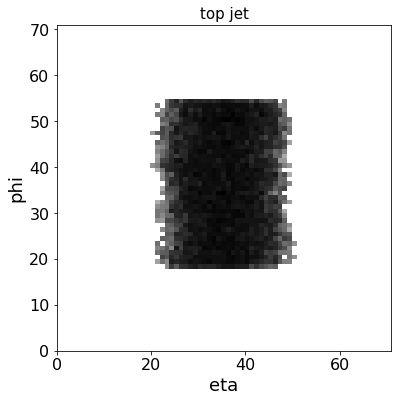

Number of jets = 2000


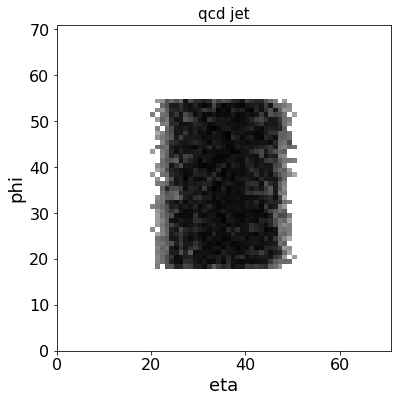

In [118]:
plot_images('tree_val_jets_2000.pkl',DReta=2*np.pi,DRphi=2*np.pi,npoints=72)

### NYU PREPROCESSING

Number of jets = 10000


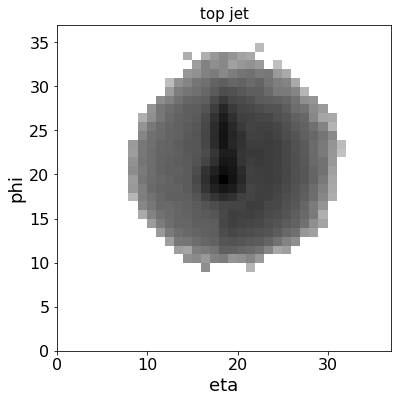

Number of jets = 10000


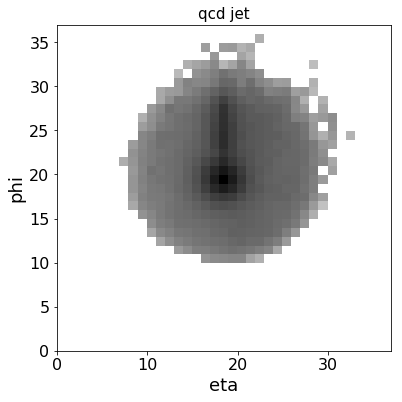

In [119]:
plot_images('tree_val_jets_10000_R_0.3_rot_boost_rot_flip.pkl')

Number of jets = 10000


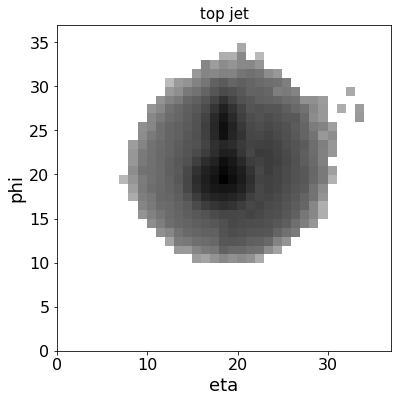

Number of jets = 10000


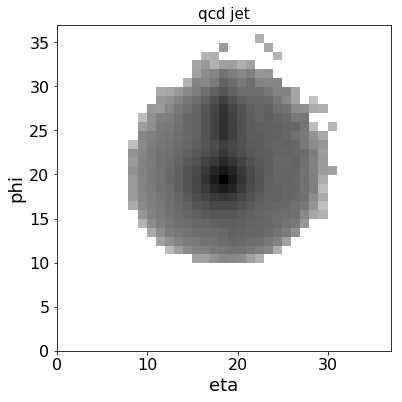

In [120]:
plot_images('tree_val_jets_10000_R_0.4_rot_boost_rot_flip.pkl')

Number of jets = 2000


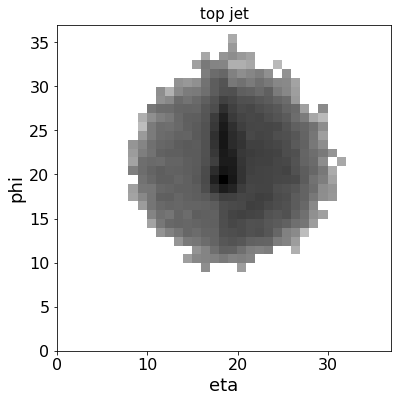

Number of jets = 2000


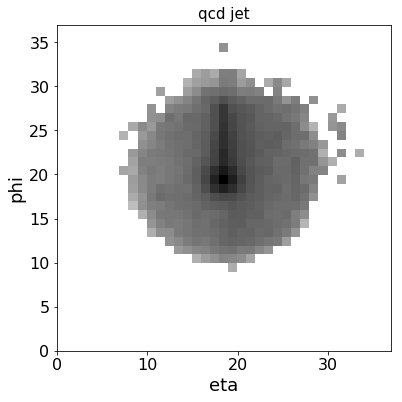

In [121]:
plot_images('tree_val_jets_2000_R_0.2_rot_boost_rot_flip.pkl')

Number of jets = 2000


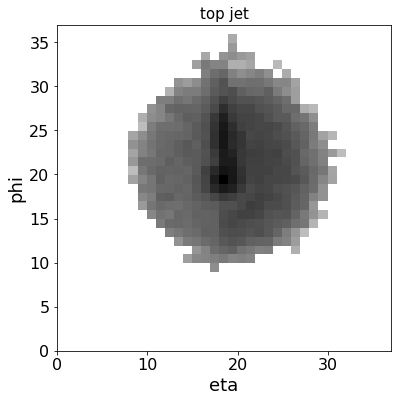

Number of jets = 2000


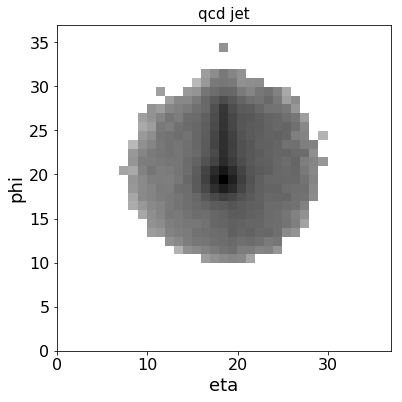

In [122]:
plot_images('tree_val_jets_2000_R_0.25_rot_boost_rot_flip.pkl')

Number of jets = 2000


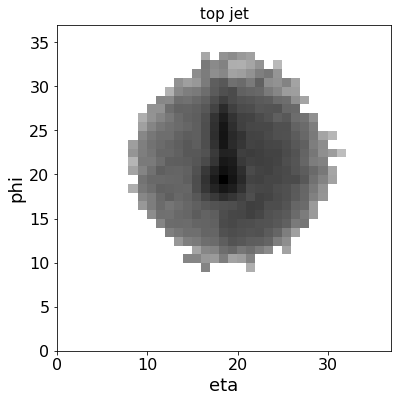

Number of jets = 2000


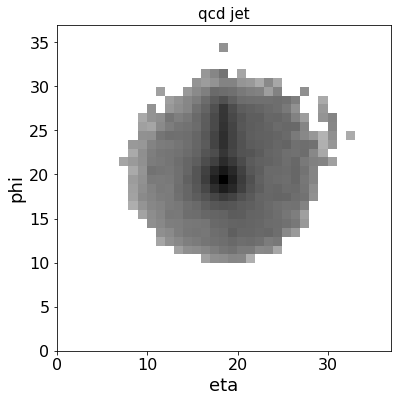

In [123]:
plot_images('tree_val_jets_2000_R_0.3_rot_boost_rot_flip.pkl')

Number of jets = 2000


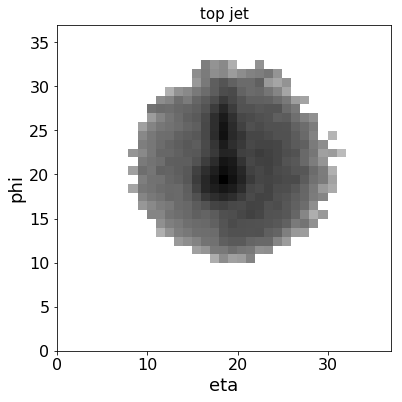

Number of jets = 2000


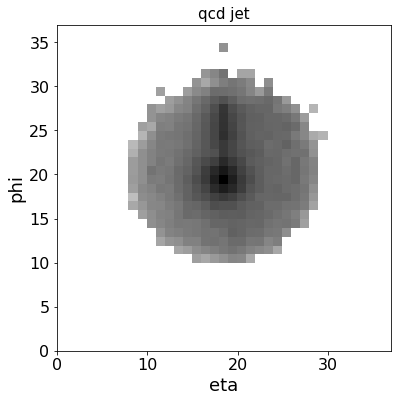

In [124]:
plot_images('tree_val_jets_2000_R_0.35_rot_boost_rot_flip.pkl')

Number of jets = 2000


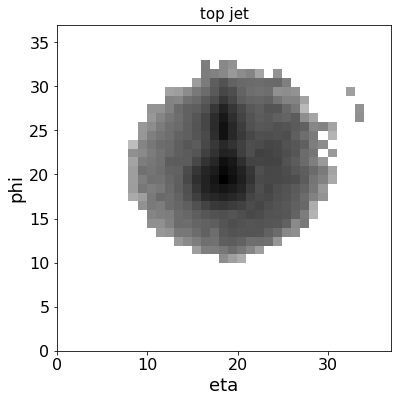

Number of jets = 2000


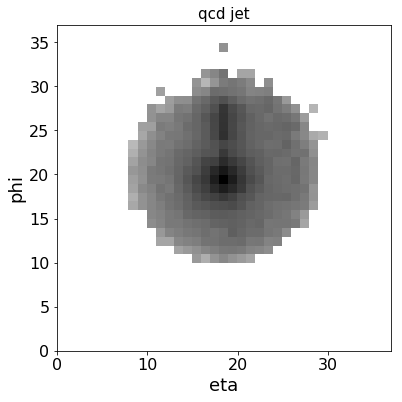

In [125]:
plot_images('tree_val_jets_2000_R_0.4_rot_boost_rot_flip.pkl')

Number of jets = 2000


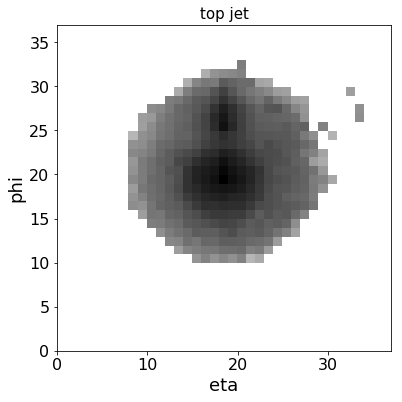

Number of jets = 2000


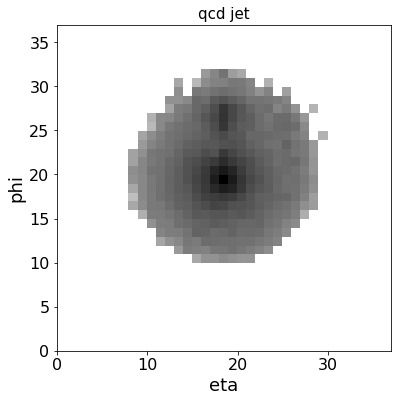

In [126]:
plot_images('tree_val_jets_2000_R_0.5_rot_boost_rot_flip.pkl')